In [2]:
from mplsoccer.pitch import VerticalPitch

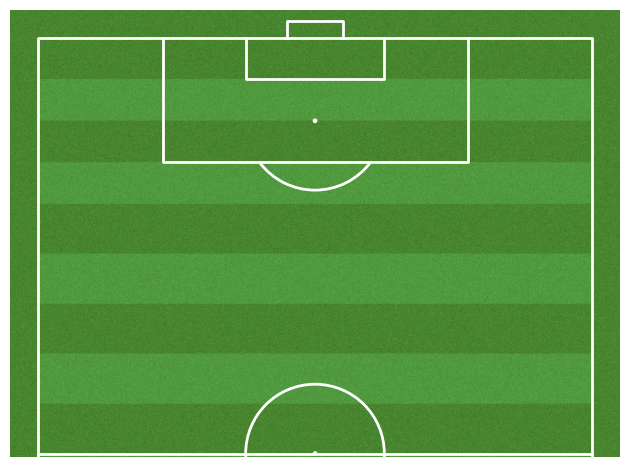

In [14]:
# draw a vertical half pitch
pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, half=True, goal_type='box', pad_bottom=0.5)
fig, ax = pitch.draw()

In [3]:
import pandas as pd
# get one goal event from the json file
df = pd.read_json("florian_wirtz_all_goal_events.json").iloc[0]
df

id                                    5085715b-09f6-403c-8b67-a546bcfed0ec
index                                                                 3284
period                                                                   2
timestamp                                       2024-06-15 00:22:25.400000
minute                                                                  67
second                                                                  25
type                                                                  Shot
possession                                                             106
possession_team                                           Bayer Leverkusen
play_pattern                                                 From Throw In
team                                                      Bayer Leverkusen
player                                                       Florian Wirtz
position                                           Left Attacking Midfield
location                 

In [23]:
df["freeze_frame"]

[{'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [85.3168050007, 26.1392977114]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [87.5990459828, 33.1169312087]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [91.7027654808, 39.2012145467]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [92.6219890153, 36.9598735778]},
 {'teammate': True,
  'actor': True,
  'keeper': False,
  'location': [93.5, 40.0999984741]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [94.0112407959, 29.2859679805]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [98.4069480553, 32.7791304122]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [98.9260205633, 15.3073955952]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [100.3615633155, 23.9807132635]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'locatio

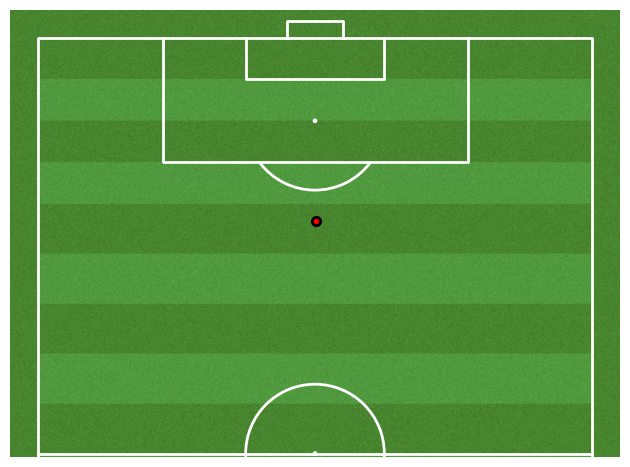

In [16]:
# draw the scorerer
pitch.scatter(df["location"][0], df["location"][1], ax=ax, edgecolors='black', linewidth=2, c='red')
fig

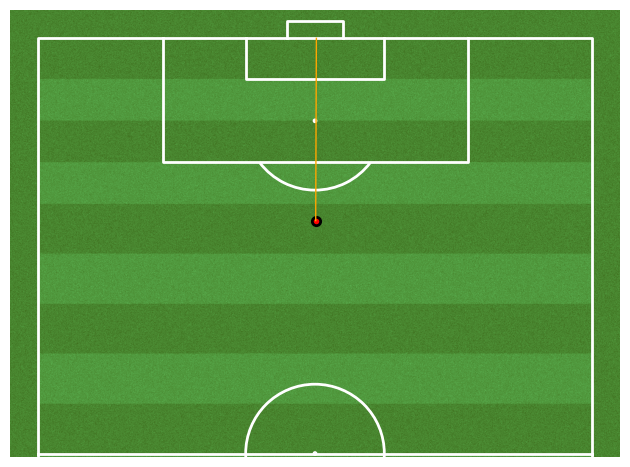

In [17]:
# draw the goal start and end coordinates with a line
pitch.lines(df["location"][0], df["location"][1], df["shot_end_location"][0], df["shot_end_location"][1], ax=ax, color='orange', linewidth=1)
fig

In [24]:
# draw the positions of all related players in the given event
for frame in df["freeze_frame"]:
    if frame["actor"] == True:
        continue
    if frame["keeper"] == True:
        pitch.scatter(frame["location"][0], frame["location"][1], ax=ax, linewidth=2, c='black')
    elif frame["teammate"] == True:
        pitch.scatter(frame["location"][0], frame["location"][1], ax=ax, linewidth=2, c='red')
    else:
        pitch.scatter(frame["location"][0], frame["location"][1], ax=ax, linewidth=2, c='blue')
# draw the scorerer again to make sure he is on top
pitch.scatter(df["location"][0], df["location"][1], ax=ax, edgecolors='black', linewidth=2, c='red')

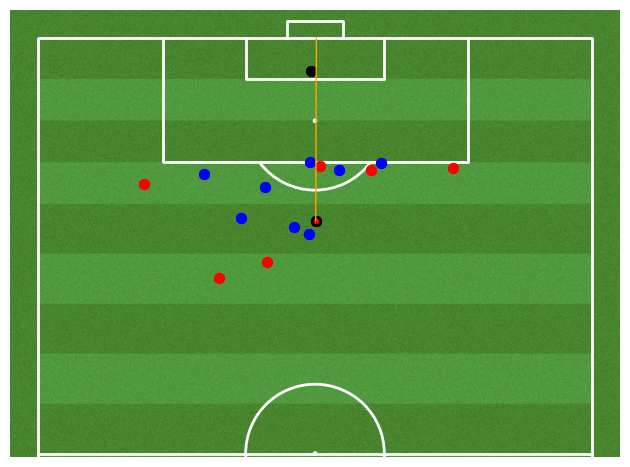

In [25]:
fig

In [26]:
fig.savefig(f"wirtz_goal_{df["minute"]}_min_{df["second"]}_sec_match_id_{df["match_id"]}.png")

In [27]:
# draw the positions of all related players in the given goal event and export the image
def draw_goal_event(row):
    pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, half=True, goal_type='box', pad_bottom=0.5)
    fig, ax = pitch.draw()
    pitch.scatter(row["location"][0], row["location"][1], ax=ax, edgecolors='black', linewidth=2, c='red')
    pitch.lines(row["location"][0], row["location"][1], row["shot_end_location"][0], row["shot_end_location"][1], ax=ax, color='orange', linewidth=1)
    for frame in row["freeze_frame"]:
        if frame["actor"] == True:
            continue
        if frame["keeper"] == True:
            pitch.scatter(frame["location"][0], frame["location"][1], ax=ax, linewidth=2, c='black')
        elif frame["teammate"] == True:
            pitch.scatter(frame["location"][0], frame["location"][1], ax=ax, linewidth=2, c='red')
        else:
            pitch.scatter(frame["location"][0], frame["location"][1], ax=ax, linewidth=2, c='blue')
    pitch.scatter(row["location"][0], row["location"][1], ax=ax, edgecolors='black', linewidth=2, c='red')
    fig.savefig(f"wirtz_goal_{row["minute"]}_min_{row["second"]}_sec_match_id_{row["match_id"]}.png")

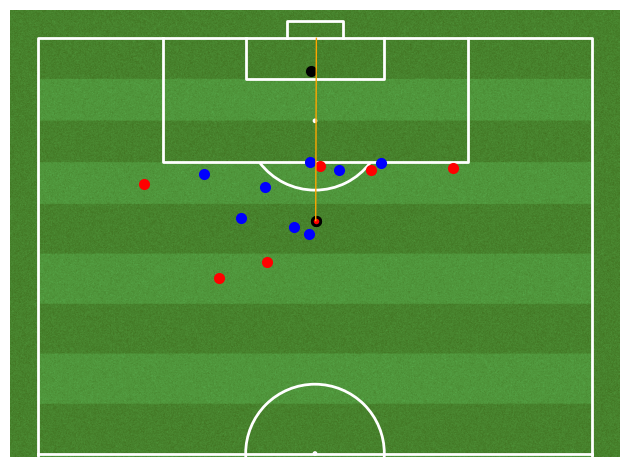

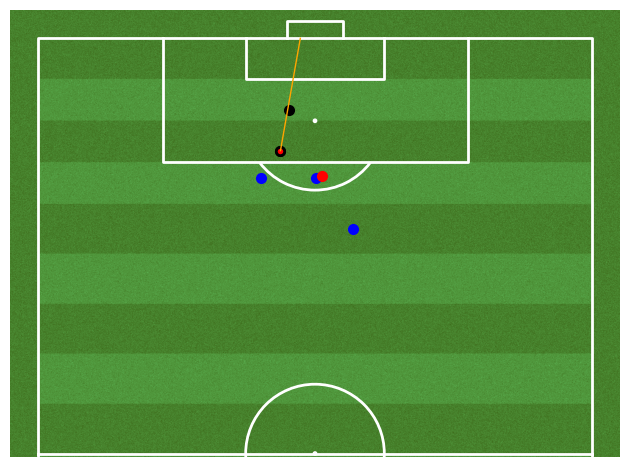

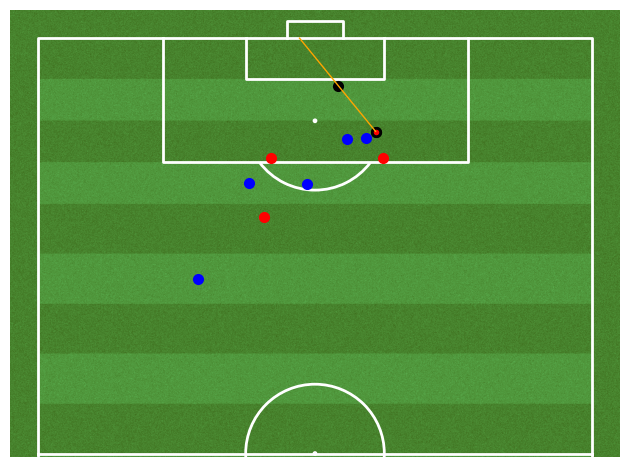

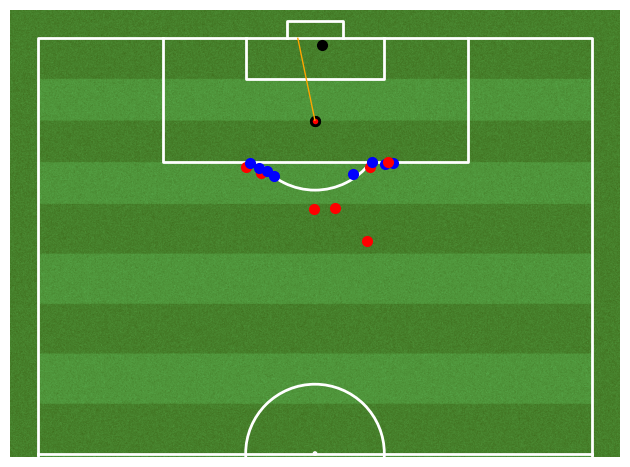

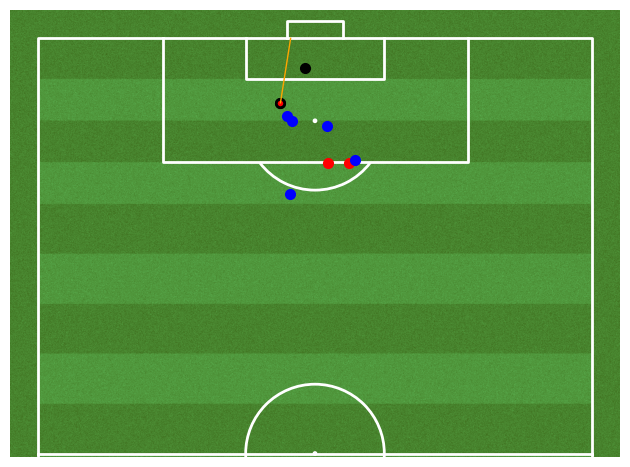

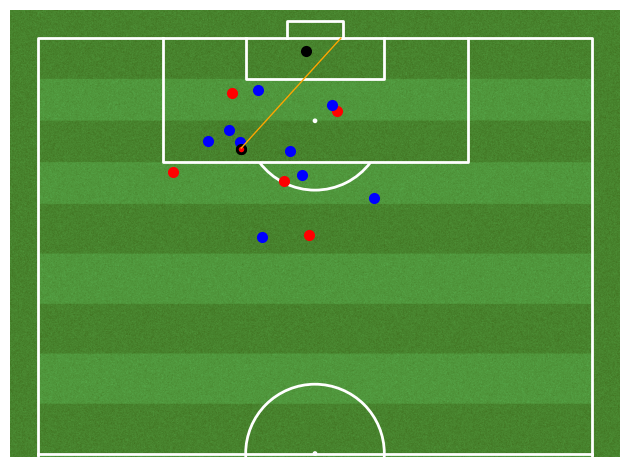

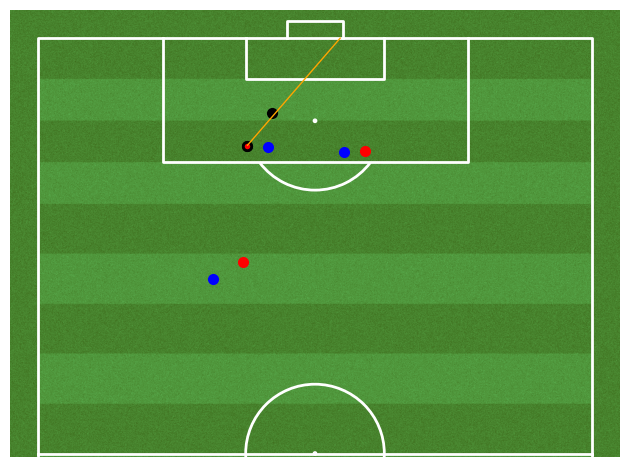

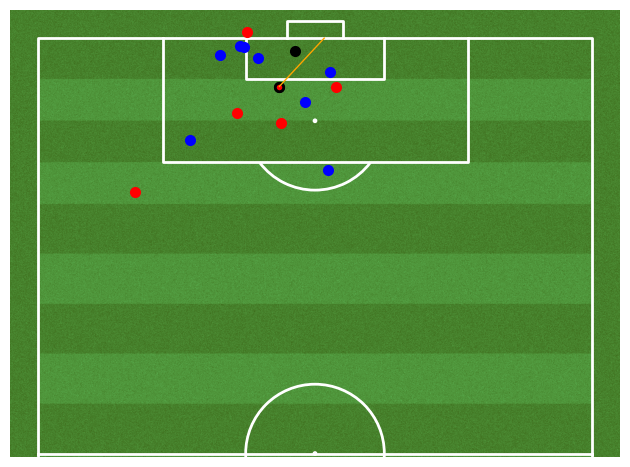

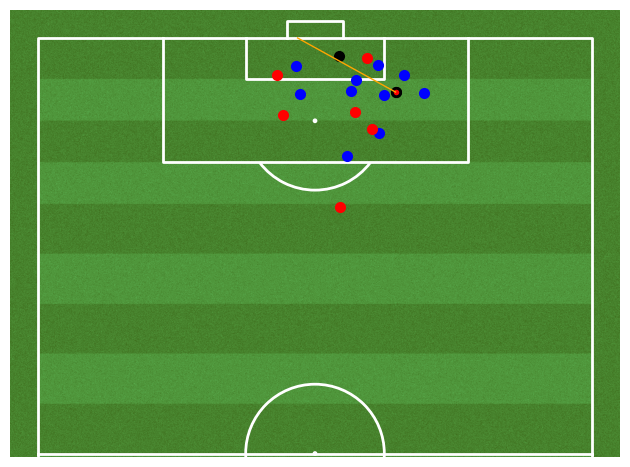

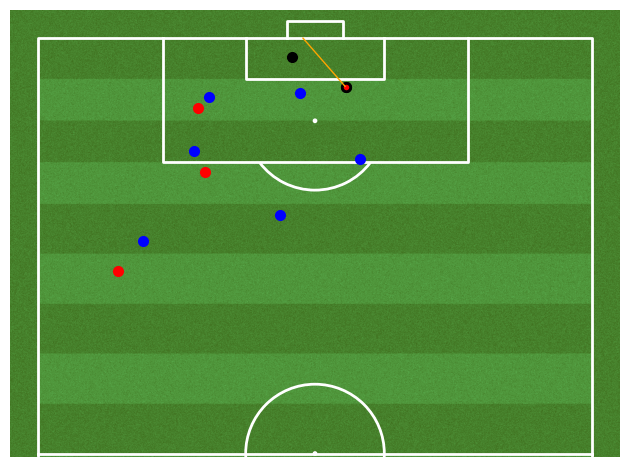

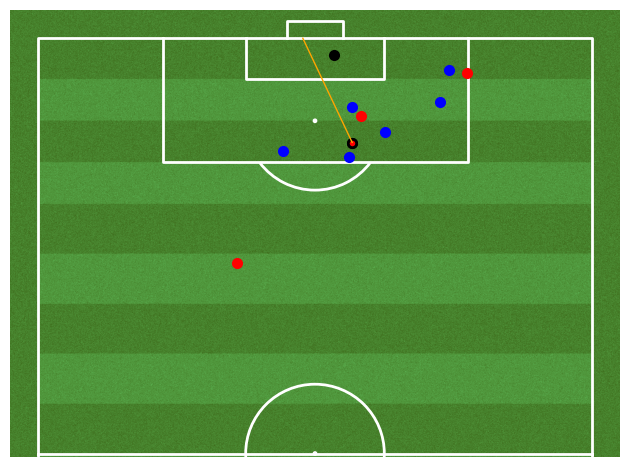

In [28]:
all_goal_events = pd.read_json("florian_wirtz_all_goal_events.json")

for i, df in all_goal_events.iterrows():
    draw_goal_event(df)

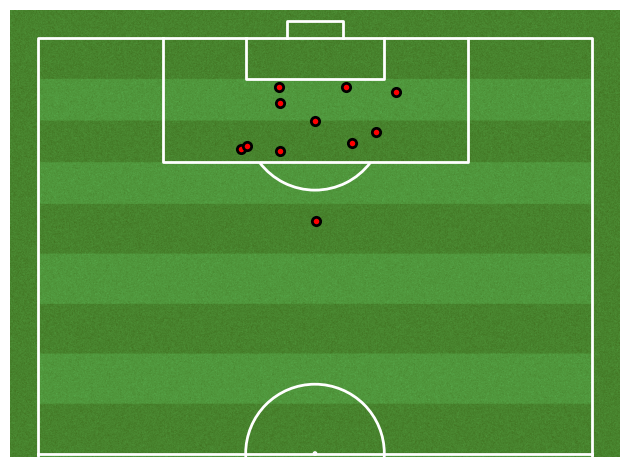

In [11]:
pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, half=True, goal_type='box', pad_bottom=0.5)
fig, ax = pitch.draw()
all_goal_events = pd.read_json("florian_wirtz_all_goal_events.json")

for i, row in all_goal_events.iterrows():
    pitch.scatter(row["location"][0], row["location"][1], ax=ax, edgecolors='black', linewidth=2, c='red')

fig.savefig("wirtz_all_goal_dots.png")